In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
import pickle

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_face7e51f5464df9a64e0096e9437318 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='k-Fdn2FNiWpJfsIG6a94SvLhAfIz1zss0lVmFx838wvT',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_face7e51f5464df9a64e0096e9437318.get_object(Bucket='winequalityprediction-donotdelete-pr-65gp0seww2fkhm',Key='winequalityN.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
data.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [7]:
data['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


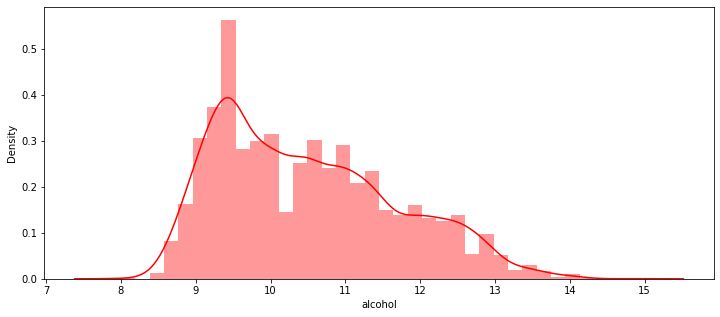

In [8]:
plt.figure(figsize=(12,5))
sns.distplot(data['alcohol'],color='r')
plt.show()

In [9]:
df_cat = data.select_dtypes(include='object')
df_cat.head()

,type
0,white
1,white
2,white
3,white
4,white


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


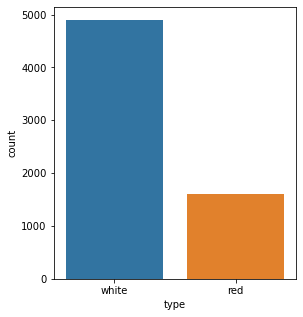

In [10]:
plt.figure(figsize=(20,5))
for i,j in enumerate(df_cat):
    plt.subplot(1,4,i+1)
    sns.countplot(data[j])   

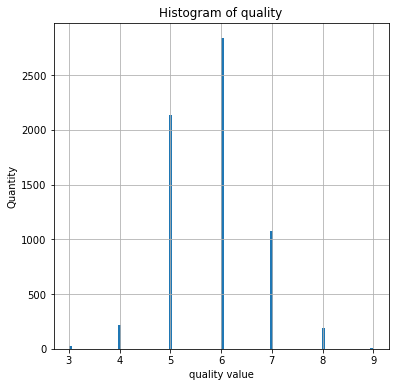

In [11]:
axarr = data.hist(column=['quality'], bins=100, figsize=(6, 6))
ax = axarr.flatten()[0]
ax.set_xlabel(f"{ax.get_title()} value")
ax.set_ylabel("Quantity")
title = ax.get_title()
ax.set_title(f"Histogram of {title}")
plt.show()

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


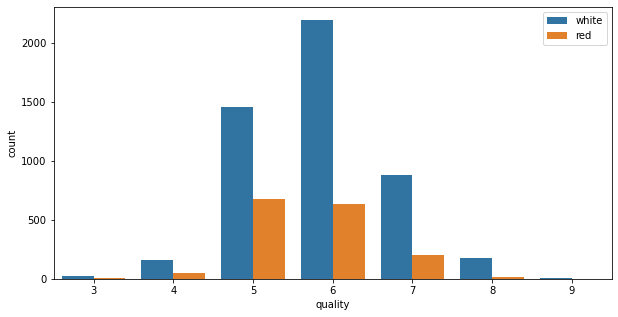

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(data['quality'],hue=data['type'])
plt.legend(loc='upper right')


No handles with labels found to put in legend.


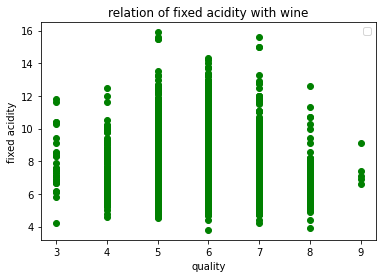

In [13]:
plt.scatter(data['quality'], data['fixed acidity'], color = 'green')
plt.title('relation of fixed acidity with wine')
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.legend()
plt.show()

No handles with labels found to put in legend.


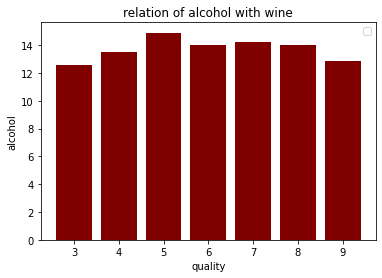

In [14]:
plt.bar(data['quality'], data['alcohol'], color = 'maroon')
plt.title('relation of alcohol with wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

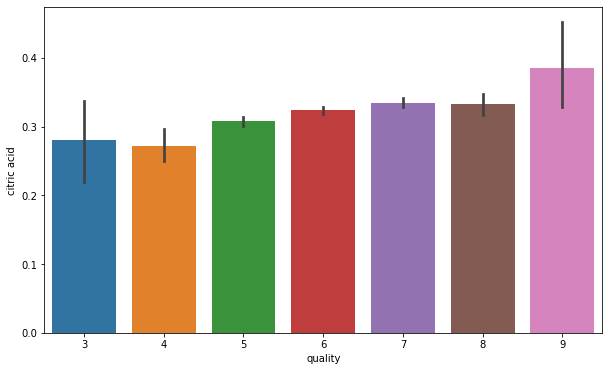

In [15]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = data)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

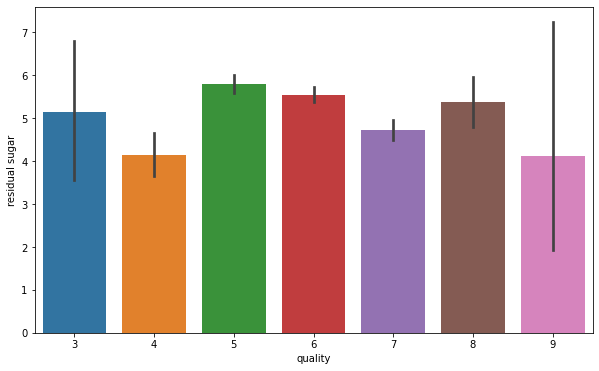

In [16]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = data)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

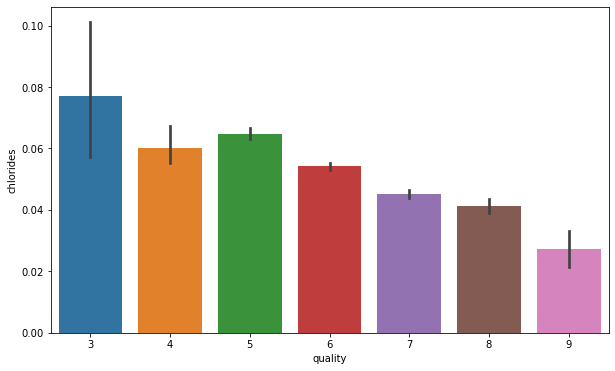

In [17]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = data)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

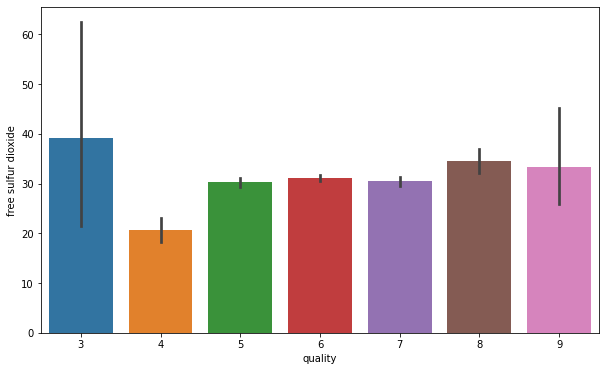

In [18]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = data)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

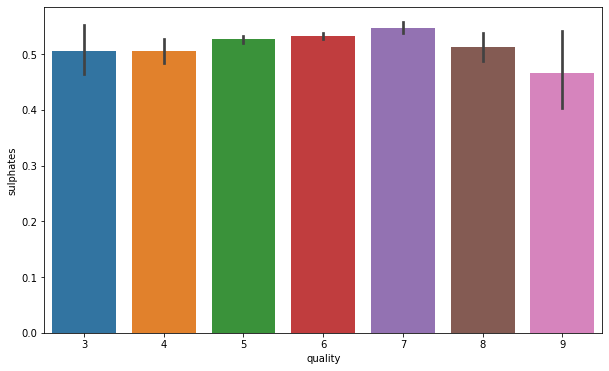

In [19]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = data)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

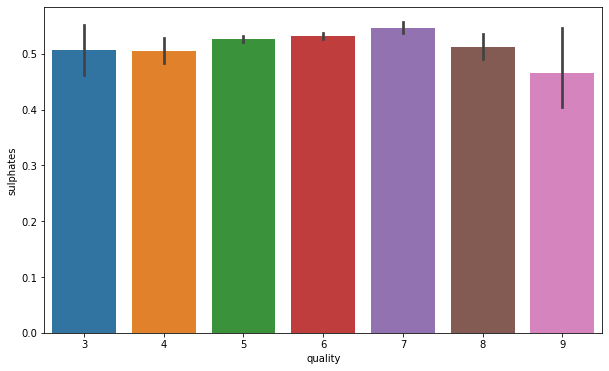

In [20]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = data)

<AxesSubplot:>

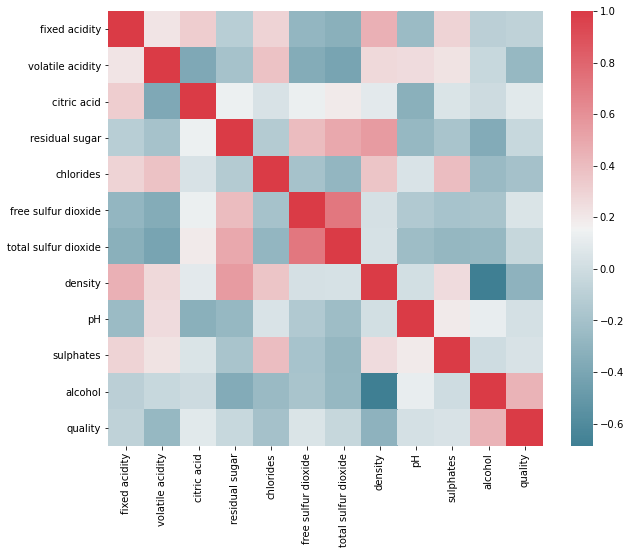

In [21]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

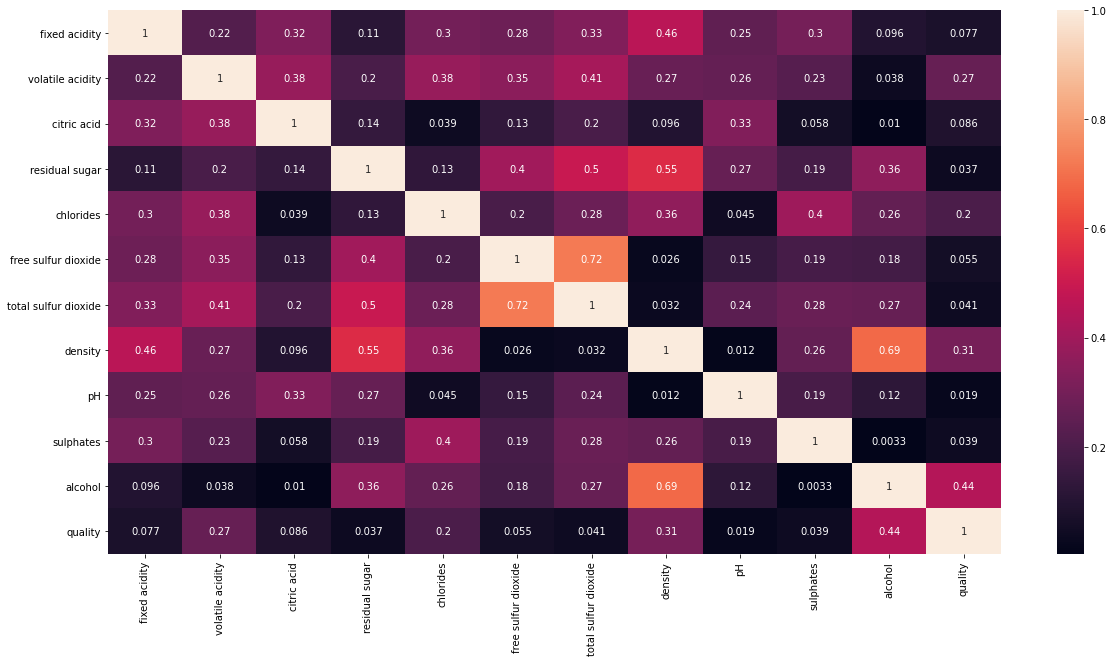

In [22]:
plt.figure(figsize = (20, 10))
sns.heatmap(data.corr().abs(), annot = True)
plt.show()

In [23]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [24]:
data = data.drop(['volatile acidity', 'total sulfur dioxide', 'chlorides', 'density'], axis = 1)
print(data.shape)

(6497, 9)


In [25]:
data.columns

Index(['type', 'fixed acidity', 'citric acid', 'residual sugar',
       'free sulfur dioxide', 'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [26]:
data['quality'] = data['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad',
                                      6: 'good', 7: 'good', 8: 'good'})

In [27]:
data['quality'].value_counts()

good    4108
bad     2384
Name: quality, dtype: int64

In [28]:
data['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [29]:
data.isnull().any()

type                   False
fixed acidity           True
citric acid             True
residual sugar          True
free sulfur dioxide    False
pH                      True
sulphates               True
alcohol                False
quality                 True
dtype: bool

In [30]:
data.isnull().sum()

type                    0
fixed acidity          10
citric acid             3
residual sugar          2
free sulfur dioxide     0
pH                      9
sulphates               4
alcohol                 0
quality                 5
dtype: int64

In [31]:
data["fixed acidity"].fillna(data["fixed acidity"].mean(),inplace = True)
data["sulphates"].fillna(data["sulphates"].mean(),inplace = True)
data["pH"].fillna(data["pH"].mean(),inplace = True)
data["residual sugar"].fillna(data["residual sugar"].mean(),inplace = True)
data["citric acid"].fillna(data["citric acid"].mean(),inplace = True)
data["quality"].fillna(data["quality"].mode()[0],inplace = True)

In [32]:
data.isnull().any()

type                   False
fixed acidity          False
citric acid            False
residual sugar         False
free sulfur dioxide    False
pH                     False
sulphates              False
alcohol                False
quality                False
dtype: bool

In [33]:
le = LabelEncoder()
data['quality'] = le.fit_transform(data['quality'])
data['type'] = le.fit_transform(data['type'])

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

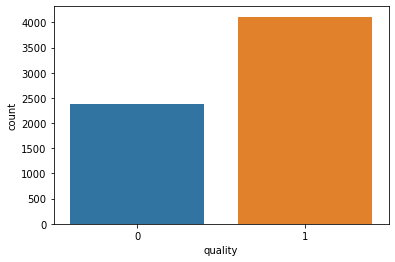

In [34]:
sns.countplot(data['quality'])

In [35]:
x = data.iloc[:,:8]
y = data.iloc[:,8:9]
print(x.shape)
print(y.shape)

(6497, 8)
(6497, 1)


In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 44)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4872, 8)
(4872, 1)
(1625, 8)
(1625, 1)


In [37]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


In [38]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.7066912972085386
Testing accuracy : 0.6904615384615385
              precision    recall  f1-score   support

           0       0.58      0.50      0.54       584
           1       0.74      0.80      0.77      1041

    accuracy                           0.69      1625
   macro avg       0.66      0.65      0.65      1625
weighted avg       0.68      0.69      0.69      1625

[[294 290]
 [213 828]]


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [39]:
model = SGDClassifier(penalty=None)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.47      0.51       584
           1       0.72      0.78      0.75      1041

    accuracy                           0.67      1625
   macro avg       0.63      0.63      0.63      1625
weighted avg       0.66      0.67      0.66      1625



/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [40]:
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training accuracy : 0.7676518883415435
Testing accuracy : 0.7304615384615385


In [41]:
param = {
    'C': [0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(model, param_grid = param, scoring = 'accuracy', cv = 10)


In [42]:
model2 = SVC(C = 1.4, gamma = 0.1, kernel = 'rbf')
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)

print(classification_report(y_test, y_pred))

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           0       0.65      0.54      0.59       584
           1       0.76      0.84      0.80      1041

    accuracy                           0.73      1625
   macro avg       0.71      0.69      0.69      1625
weighted avg       0.72      0.73      0.72      1625



In [43]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.7089230769230769


In [44]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.63      0.61       584
           1       0.79      0.75      0.77      1041

    accuracy                           0.71      1625
   macro avg       0.69      0.69      0.69      1625
weighted avg       0.71      0.71      0.71      1625

[[370 214]
 [259 782]]


In [45]:
model_eval = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
model_eval.mean()


0.744050644629212

In [46]:
rfmodel = RandomForestClassifier(n_estimators = 200)
rfmodel.fit(x_train, y_train)
y_pred = rfmodel.predict(x_test)
print("Training accuracy :", rfmodel.score(x_train, y_train))
print("Testing accuracy :", rfmodel.score(x_test, y_test))

/tmp/wsuser/ipykernel_596/2558179996.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfmodel.fit(x_train, y_train)


Training accuracy : 1.0
Testing accuracy : 0.8123076923076923


In [47]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.77      0.68      0.72       584\n           1       0.83      0.89      0.86      1041\n\n    accuracy                           0.81      1625\n   macro avg       0.80      0.78      0.79      1625\nweighted avg       0.81      0.81      0.81      1625\n'

In [48]:
confusion_matrix(y_test, y_pred)

array([[396, 188],
       [117, 924]])

In [49]:
model_eval = cross_val_score(estimator = rfmodel, X = x_train, y = y_train, cv = 5)
model_eval.mean()

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/model_selec

0.8050077396935713

In [50]:
def logisticRegression(x_train, x_test, y_train, y_test):
    model = LogisticRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('***logisticRegression***')
    print("Training accuracy :", model.score(x_train, y_train))
    print("Testing accuracy :", model.score(x_test, y_test))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

In [51]:
def SGD(x_train, x_test, y_train, y_test):
    model = SGDClassifier(penalty=None)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('***Stochastic Gradient Descent Classifier***')
    print("Training accuracy :", model.score(x_train, y_train))
    print("Testing accuracy :", model.score(x_test, y_test))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

In [52]:
def SVClassifier(x_train, x_test, y_train, y_test):
    model = SVC()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('***Support Vector Classifier***')
    print("Training accuracy :", model.score(x_train, y_train))
    print("Testing accuracy :", model.score(x_test, y_test))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

In [53]:
def decisionTree(x_train, x_test, y_train, y_test):
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    yPred = dt.predict(x_test)
    print('***DecisionTreeClassifier***')
    print("Training accuracy :", dt.score(x_train, y_train))
    print("Testing accuracy :", dt.score(x_test, y_test))
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [54]:
def randomForest(x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    yPred = rf.predict(x_test)
    print('***RandomForestClassifier***')
    print("Training accuracy :", rf.score(x_train, y_train))
    print("Testing accuracy :", rf.score(x_test, y_test))
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [55]:
def xgboost(x_train, x_test, y_train, y_test):
    xg = GradientBoostingClassifier()
    xg.fit(x_train,y_train)
    yPred = xg.predict(x_test)
    print('***GradientBoostingClassifier***')
    print("Training accuracy :", xg.score(x_train, y_train))
    print("Testing accuracy :", xg.score(x_test, y_test))
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [56]:
def compareModel(x_train, x_test, y_train, y_test):
    logisticRegression(x_train, x_test, y_train, y_test)
    print('-'*100)
    SGD(x_train, x_test, y_train, y_test)
    print('-'*100)
    SVClassifier(x_train, x_test, y_train, y_test)
    print('-'*100)
    decisionTree(x_train, x_test, y_train, y_test)
    print('-'*100)
    randomForest(x_train, x_test, y_train, y_test)
    print('-'*100)
    xgboost(x_train, x_test, y_train, y_test)
    print('-'*100)

In [57]:
compareModel(x_train, x_test, y_train, y_test)

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


***logisticRegression***
Training accuracy : 0.7066912972085386
Testing accuracy : 0.6904615384615385
              precision    recall  f1-score   support

           0       0.58      0.50      0.54       584
           1       0.74      0.80      0.77      1041

    accuracy                           0.69      1625
   macro avg       0.66      0.65      0.65      1625
weighted avg       0.68      0.69      0.69      1625

[[294 290]
 [213 828]]
----------------------------------------------------------------------------------------------------
***Stochastic Gradient Descent Classifier***
Training accuracy : 0.68123973727422
Testing accuracy : 0.6701538461538461
              precision    recall  f1-score   support

           0       0.54      0.54      0.54       584
           1       0.74      0.74      0.74      1041

    accuracy                           0.67      1625
   macro avg       0.64      0.64      0.64      1625
weighted avg       0.67      0.67      0.67      1625



/tmp/wsuser/ipykernel_596/1264059584.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


***RandomForestClassifier***
Training accuracy : 1.0
Testing accuracy : 0.8178461538461539
Confusion matrix
[[408 176]
 [120 921]]
Classification report
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       584
           1       0.84      0.88      0.86      1041

    accuracy                           0.82      1625
   macro avg       0.81      0.79      0.80      1625
weighted avg       0.82      0.82      0.82      1625

----------------------------------------------------------------------------------------------------


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


***GradientBoostingClassifier***
Training accuracy : 0.791871921182266
Testing accuracy : 0.7390769230769231
Confusion matrix
[[347 237]
 [187 854]]
Classification report
              precision    recall  f1-score   support

           0       0.65      0.59      0.62       584
           1       0.78      0.82      0.80      1041

    accuracy                           0.74      1625
   macro avg       0.72      0.71      0.71      1625
weighted avg       0.73      0.74      0.74      1625

----------------------------------------------------------------------------------------------------


In [58]:
pickle.dump(rfmodel,open('wineQuality_new.pkl','wb'))

In [59]:
import ibm_watson_machine_learning

In [60]:
from ibm_watson_machine_learning import APIClient
import json

In [63]:
wml_credentials={"apikey":"vJFrz7R7INcTcwg19O_7jCvKTJQSO3fz1p3oR6HobCEl",
                "url":"https://us-south.ml.cloud.ibm.com"}

In [65]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ------------  ------------------------
ID                                    NAME          CREATED
aae9e6c6-4613-453b-b810-4830a143ad81  wine_quality  2022-03-26T12:45:33.255Z
------------------------------------  ------------  ------------------------


In [66]:
SPACE_ID="aae9e6c6-4613-453b-b810-4830a143ad81"

In [67]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [68]:
MODEL_NAME = "Wine Quality"
DEPLOYMENT_NAME = "wine_quality"
BEST_MODEL = rfmodel

In [69]:
software_spec_uid = wml_client.software_specifications.get_id_by_name("default_py3.8")
model_props = {
    wml_client.repository.ModelMetaNames.NAME:MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE:'scikit-learn_0.23',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID : software_spec_uid
}

In [70]:
model_details = wml_client.repository.store_model(
    model = BEST_MODEL,
    meta_props = model_props,
    training_data = x_train,
    training_target = y_train
)

Note: Warnings!! :  Software specification default_py3.8 specified for the wml_model is deprecated and will be removed in the future. We recommend you use runtime-22.1-py3.9 instead. For details see Supported Frameworks https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/pm_service_supported_frameworks.html


In [71]:
software_spec_uid

'ab9e1b80-f2ce-592c-a7d2-4f2344f77194'

In [72]:
model_uid = wml_client.repository.get_model_id(model_details)

In [73]:
model_uid

'7c4fefd4-1707-4b2a-9550-6037a755dc5a'

In [74]:
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE:{}
}

In [75]:
deployment = wml_client.deployments.create(artifact_uid=model_uid,meta_props=deployment_props)



#######################################################################################

Synchronous deployment creation for uid: '7c4fefd4-1707-4b2a-9550-6037a755dc5a' started

#######################################################################################


initializing
Note: Software specification default_py3.8 is deprecated. Use runtime-22.1-py3.9 software specification instead. For details, see https://dataplatform.cloud.ibm.com/docs/content/wsj/wmls/wmls-deploy-python-types.html?context=cpdaas.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='93df9f96-f20b-4bba-bba6-f4e0d1410f34'
------------------------------------------------------------------------------------------------




In [76]:
deployment_uid = wml_client.deployments.get_uid(deployment)
deployment_uid

'93df9f96-f20b-4bba-bba6-f4e0d1410f34'